In [1]:
import folium
from folium.plugins import HeatMap
import branca
import json
from folium import GeoJson
import pandas as pd
import geopandas as gpd
import matplotlib
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
sozial = {"Stadtteil": ["Aegidii", "Überwasser", "Dom", "Buddenturm","Martini",
                        "Pluggendorf", "Josef", "Bahnhof", "Hansa-Viertel", "Mauritz-West", "Schlachthof",
                        "Kreuz", "Neutor", "Schloss", "Aaseestadt", "Geist", "Schützenhof", "Düesberg", 
                        "Hafen", "Herz-Jesu", "Mauritz-Mitte", "Rumphorst", "Uppenberg", "Gievenbeck", "Sentrup", "Mecklenbeck",
                        "Albachten", "Roxel", "Nienberge","Coerde", "Kinderhaus-Ost", "Kinderhaus-West", "Sprakel", "Mauritz-Ost",
                        "Gelmer-Dyckburg", "Handorf", "Gremmendorf-West", "Gremmendorf-Ost", "Angelmodde", "Wolbeck", "Berg Fidel", 
                        "Hiltrup-Ost", "Hiltrup-Mitte", "Hiltrup-West", "Amelsbüren"],
          "Anteil der Arbeitslosen im Alter 15 bis 64": [1.76744186046512, 1.2636899747262, 1.63220892274211, 2.1551724137931, 2.11693548387097,
                                                                   1.95367010884733, 3.16128129808365, 3.33575054387237, 2.7236045729657,
                                                                   2.26645644461963, 2.24846695434931, 1.71306209850107, 1.94444444444444, 1.37851809304997,
                                                                   2.99876084262701, 3.38779793134463, 2.99410487123798, 2.99163179916318, 2.64270613107822,
                                                                   2.44557914539102, 2.26354082457559, 2.20646178092987, 4.1037037037037, 2.97762043241876,
                                                                   1.67252048837598, 3.1025243266112, 2.75744265495364, 3.46292061417837, 4.04386566141193,
                                                                   8.2018927444795, 5.04249291784703, 6.35934885136163, 3.07898259705489, 3.38753387533875,
                                                                   3.52281825460368, 3.29578639966625, 4.913217623498, 2.94722412611378, 5.58274424506072,
                                                                   3.50088325036133, 7.65899864682003, 2.8165162701668, 5.4571796522859, 4.50197889182058, 3.27792086162491],
         "Anteil der Kinder mit Migrationshintergrund": [34.8684210526316, 40.9836065573771, 34.5794392523364, 36.734693877551, 42.1052631578947, 24.7663551401869,
                                                                    23.8013698630137, 63.8297872340426, 30.4042179261863, 20.8530805687204, 33.28611898017,
                                                                    18.0105501130369, 46.6346153846154, 32.15859030837, 37.8443113772455, 27.2430668841762,
                                                                    44.7204968944099, 22.9070837166513, 32.3943661971831, 27.1119842829077, 26.7269736842105, 
                                                                    29.0032154340836, 37.8077839555203, 44.3110348770726, 29.1073738680466, 38.7266355140187, 
                                                                    38.9928057553957, 37.7304147465438, 31.6814159292035, 68.4050247430529, 42.1926910299003,
                                                                    60.8803165182987, 42.4552429667519, 28.75851231011, 29.1390728476821, 29.5748613678373,
                                                                    45.8455522971652, 25.6840247131509, 50.7580011229646, 34.4810624692573, 73.2049036777583,
                                                                    30.5208333333333, 38.4671005061461, 43.9716312056738, 35.7090374724467],
          "Anteil der Kinder in alleinerziehenden Haushalten": [15.8940397350993, 16.6666666666667, 15.5339805825243, 18.0555555555556, 15.7894736842105,
                                                                13.9423076923077, 18.7285223367698, 20, 26.6429840142096, 15.311004784689, 19.4244604316547, 
                                                                17.2333848531685, 19.6125907990315, 16.4444444444444, 18.719806763285, 24.8157248157248, 
                                                                21.5174129353234, 12.6629422718808, 14.0845070422535, 17.5675675675676, 17.588769611891,
                                                                16.5684348395547, 20.796812749004, 16.3594470046083, 10.4575163398693, 13.2352941176471, 
                                                                14.3890093998554, 14.4599303135889, 12.1428571428571, 29.9654245101806, 23.469387755102, 
                                                                22.1278721278721, 12.1604139715395, 14.2933333333333, 14.9732620320856, 14.6848602988954, 
                                                                18.5222672064777, 15.3434433541481, 19.248291571754, 13.7148495313271, 23.4042553191489, 
                                                                12.7118644067797, 24.6176256372906, 16.8234643054787, 16.8773234200744], 
          "Anteil der Kinder, bei denen die Eltern SGB 2 beziehen": [0.78125, 1.78571428571429, 4.16666666666667, 6.2992125984252, 0, 3.51758793969849,
                                                                     4.00763358778626, 19.7530864197531, 9.4, 5.05415162454874, 7.89915966386555, 1.8308631211857, 
                                                                     21.5083798882682, 3.98009950248756, 8.32157968970381, 12.0038722168441, 7.81032078103208, 
                                                                     6.75381263616558, 2.89855072463768, 4.32801822323462, 6.71859785783836, 6.02593440122044, 
                                                                     15.8480074142725, 13.969813969814, 7.79220779220779, 8.93470790378007, 9.31458699472759, 
                                                                     10.7420494699647, 7.32758620689655, 38.1720430107527, 14.8880105401845, 25.462962962963,
                                                                     7.07831325301205, 9.45945945945946, 7.48407643312102, 8.46210448859456, 14.1835518474374, 
                                                                     5.57341907824223, 20.6017004578156, 8.85566417481311, 31.4285714285714, 5.875, 12.5214408233276,
                                                                     14.5348837209302, 12.5905797101449]}          
Soziales_DataFrame = pd.DataFrame(sozial)


In [3]:
Soziales_DataFrame['Anteil der Kinder mit Migrationshintergrund'] = Soziales_DataFrame['Anteil der Kinder mit Migrationshintergrund'] / 10

In [9]:
Soziales_DataFrame.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Stadtteil                                               45 non-null     object 
 1   Anteil der Arbeitslosen im Alter 15 bis 64              45 non-null     float64
 2   Anteil der Kinder mit Migrationshintergrund             45 non-null     float64
 3   Anteil der Kinder in alleinerziehenden Haushalten       45 non-null     float64
 4   Anteil der Kinder, bei denen die Eltern SGB 2 beziehen  45 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.9+ KB


<Axes: xlabel='Stadtteil'>

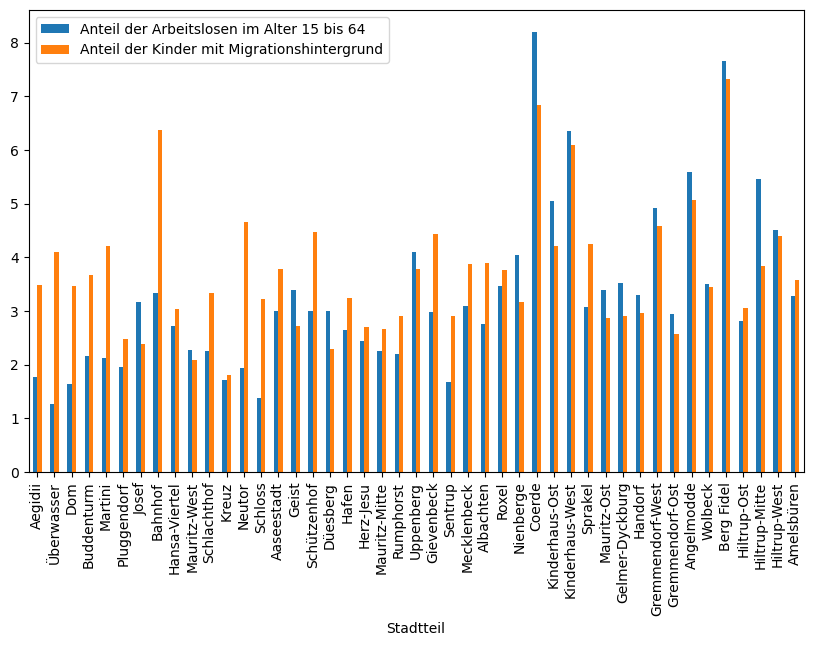

In [4]:
Soziales_DataFrame.plot(x='Stadtteil', 
                        y=["Anteil der Arbeitslosen im Alter 15 bis 64", "Anteil der Kinder mit Migrationshintergrund"], 
                        kind='bar', figsize=(10, 6))

In [ ]:
Soziales_DataFrame.set_index('Stadtteil', inplace=True)
Soziales_DataFrame.plot(kind='bar', figsize=(10, 6))

In [ ]:
Realschule = []
with open("Realschule_Staedtisch_CSV.txt","r") as textFile:
    TextLines = textFile.readlines()
for Row in TextLines:
    Row = Row.split("\t") # Excel trennt Zeilen bei CSV-Export mit Tabs
    Realschule.append(Row)
    

Gymnasium = []
with open("Gymnasium_Staedtisch_CSV.txt","r") as textFile:
    TextLines = textFile.readlines()
for Row in TextLines:
    Row = Row.split("\t") # Excel trennt Zeilen bei CSV-Export mit Tabs
    Gymnasium.append(Row)
    

Gesamtschule = []
with open("Gesamtschule_Staedtisch_CSV.txt","r") as textFile:
    TextLines = textFile.readlines()
for Row in TextLines:
    Row = Row.split("\t") # Excel trennt Zeilen bei CSV-Export mit Tabs
    Gesamtschule.append(Row)
    
print(Gesamtschule) 

In [ ]:
Grundschule_DataFrame = pd.read_csv("Grundschule_DataFrame.csv")
Hauptschule_DataFrame = pd.read_csv("Hauptschule_DataFrame.csv")
Foerderschule_DataFrame = pd.read_csv("Foerderschule_DataFrame.csv")
Primusschule_DataFrame = pd.read_csv("PRIMUS-Schule_DataFrame.csv")

Realschule_DataFrame = pd.DataFrame(Realschule, columns=['Schulart',"Stadtteil","AlleSchüler","Doof"])
Realschule_DataFrame = Realschule_DataFrame.loc[0:6,["Schulart","Stadtteil","AlleSchüler"]] 

Gymnasium_DataFrame = pd.DataFrame(Gymnasium, columns=['Schulart',"Stadtteil","AlleSchüler","Doof"])
Gymnasium_DataFrame = Gymnasium_DataFrame.loc[0:20,["Schulart","Stadtteil","AlleSchüler"]] 

Gesamtschule_DataFrame = pd.DataFrame(Gesamtschule, columns=['Schulart',"Stadtteil","AlleSchüler","Doof"])
Gesamtschule_DataFrame = Gesamtschule_DataFrame.loc[0:20,["Schulart","Stadtteil","AlleSchüler"]] 

In [ ]:
Gesamtschule_DataFrame['AlleSchüler'] = Gesamtschule_DataFrame['AlleSchüler'].astype(int)
Realschule_DataFrame['AlleSchüler'] = Realschule_DataFrame['AlleSchüler'].astype(int)
Gymnasium_DataFrame['AlleSchüler'] = Gymnasium_DataFrame['AlleSchüler'].astype(int)

In [ ]:
GesamtDataFrame = pd.concat([Grundschule_DataFrame, Hauptschule_DataFrame, Foerderschule_DataFrame, Primusschule_DataFrame], ignore_index=True)

In [ ]:
del GesamtDataFrame['Unnamed: 0']


In [ ]:
GesamtDataFrame['AlleSchüler'] = GesamtDataFrame['Klasse 1 (gesamt)'] + GesamtDataFrame['Klasse 2 (gesamt)'] + GesamtDataFrame['Klasse 3 (gesamt)'] + GesamtDataFrame['Klasse 4 (gesamt)'] + GesamtDataFrame['Klasse 5 (gesamt)'] + GesamtDataFrame['Klasse 6 (gesamt)'] + GesamtDataFrame['Klasse 7 (gesamt)'] + GesamtDataFrame['Klasse 8 (gesamt)'] + GesamtDataFrame['Klasse 9 (gesamt)'] + GesamtDataFrame['Klasse 10 (gesamt)'] + GesamtDataFrame['Klasse 11 (gesamt)'] + GesamtDataFrame['Klasse 12 (gesamt)'] + GesamtDataFrame['Klasse 13 (gesamt)'] 

GesamtDataFrame.drop(GesamtDataFrame.columns[6:19], axis=1, inplace = True)




In [ ]:
Grundschule_DataFrame = GesamtDataFrame[GesamtDataFrame['Schulart'] == 'Grundschule']
Hauptschule_DataFrame = GesamtDataFrame[GesamtDataFrame['Schulart'] == 'Hauptschule']
Foerderschule_DataFrame = GesamtDataFrame[GesamtDataFrame['Schulart'] == 'Foerderschule']
Primisschule_DataFrame = GesamtDataFrame[GesamtDataFrame['Schulart'] == 'Primisschule']

In [ ]:
Realschule_DataFrame = Realschule_DataFrame.groupby('Stadtteil')['AlleSchüler'].sum().reset_index()
Gymnasium_DataFrame = Gymnasium_DataFrame.groupby('Stadtteil')['AlleSchüler'].sum().reset_index()
Gesamtschule_DataFrame = Gesamtschule_DataFrame.groupby('Stadtteil')['AlleSchüler'].sum().reset_index()


Grundschule_DataFrame = Grundschule_DataFrame.groupby('Stadtteil')['AlleSchüler'].sum().reset_index()
Hauptschule_DataFrame = Hauptschule_DataFrame.groupby('Stadtteil')['AlleSchüler'].sum().reset_index()
Foerderschule_DataFrame = Foerderschule_DataFrame.groupby('Stadtteil')['AlleSchüler'].sum().reset_index()
Primisschule_DataFrame = Primisschule_DataFrame.groupby('Stadtteil')['AlleSchüler'].sum().reset_index()

In [ ]:
GeopandasMünster = gpd.read_file('stadtteile-statistische-bezirke-muenster.geojson')



In [ ]:
Soziales_DataFrame = pd.merge(Soziales_DataFrame , GeopandasMünster[["NAME_STATI",'geometry']], on=None, left_on="Stadtteil", right_on="NAME_STATI", how='left')

Realschule_DataFrame   = pd.merge(Realschule_DataFrame , GeopandasMünster[["NAME_STATI",'geometry']], on=None, left_on="Stadtteil", right_on="NAME_STATI", how='left')
Gymnasium_DataFrame    = pd.merge(Gymnasium_DataFrame  , GeopandasMünster[["NAME_STATI",'geometry']], on=None, left_on="Stadtteil", right_on="NAME_STATI", how='left')
Gesamtschule_DataFrame = pd.merge(Gesamtschule_DataFrame , GeopandasMünster[["NAME_STATI",'geometry']], on=None, left_on="Stadtteil", right_on="NAME_STATI", how='left')

Grundschule_DataFrame = pd.merge(Grundschule_DataFrame , GeopandasMünster[["NAME_STATI",'geometry']], on=None, left_on="Stadtteil", right_on="NAME_STATI", how='left')
Hauptschule_DataFrame = pd.merge(Hauptschule_DataFrame , GeopandasMünster[["NAME_STATI",'geometry']], on=None, left_on="Stadtteil", right_on="NAME_STATI", how='left')
Foerderschule_DataFrame = pd.merge(Foerderschule_DataFrame , GeopandasMünster[["NAME_STATI",'geometry']], on=None, left_on="Stadtteil", right_on="NAME_STATI", how='left')
Primisschule_DataFrame = pd.merge(Primisschule_DataFrame , GeopandasMünster[["NAME_STATI",'geometry']], on=None, left_on="Stadtteil", right_on="NAME_STATI", how='left')

In [ ]:
Soziales_DataFrame.drop(Soziales_DataFrame.columns[5:6], axis=1, inplace = True)


Realschule_DataFrame.drop(Realschule_DataFrame.columns[2:3], axis=1, inplace = True)
Gymnasium_DataFrame.drop(Gymnasium_DataFrame.columns[2:3], axis=1, inplace = True)
Gesamtschule_DataFrame.drop(Gesamtschule_DataFrame.columns[2:3], axis=1, inplace = True)


Grundschule_DataFrame.drop(Grundschule_DataFrame.columns[2:3], axis=1, inplace = True)
Hauptschule_DataFrame.drop(Hauptschule_DataFrame.columns[2:3], axis=1, inplace = True)
Foerderschule_DataFrame.drop(Foerderschule_DataFrame.columns[2:3], axis=1, inplace = True)
Primisschule_DataFrame.drop(Primisschule_DataFrame.columns[2:3], axis=1, inplace = True)

In [ ]:
Soziales_DataFrame = gpd.GeoDataFrame(Soziales_DataFrame, geometry = 'geometry')

Realschule_DataFrame = gpd.GeoDataFrame(Realschule_DataFrame, geometry = 'geometry')
Gymnasium_DataFrame   = gpd.GeoDataFrame(Gymnasium_DataFrame, geometry = 'geometry')
Gesamtschule_DataFrame    = gpd.GeoDataFrame(Gesamtschule_DataFrame, geometry = 'geometry')


Grundschule_DataFrame    = gpd.GeoDataFrame(Grundschule_DataFrame, geometry = 'geometry')
Hauptschule_DataFrame   = gpd.GeoDataFrame(Hauptschule_DataFrame, geometry = 'geometry')
Foerderschule_DataFrame    = gpd.GeoDataFrame(Foerderschule_DataFrame, geometry = 'geometry')
Primisschule_DataFrame    = gpd.GeoDataFrame(Primisschule_DataFrame, geometry = 'geometry')

In [ ]:
KarteVonMünster = folium.Map(location=[51.956239, 7.644752], zoom_start=10)
SozialKarteVonMünster = folium.Map(location=[51.956239, 7.644752], zoom_start=10)

In [ ]:
def get_opacity(feature):
    # Get the value of 'some_column' for the current feature
    value = int(feature['properties']['AlleSchüler'])
    # Normalize the value to be between 0 and 1 (for opacity range)
    # Assuming 'some_column' values are between 0 and 100, adjust this as needed
    opacity = max(0, min(value / 2000, 1))
    return opacity

def get_opacity_Arbeitslosigkeit(feature):
    # Get the value of 'some_column' for the current feature
    value = int(feature['properties']['Anteil der Arbeitslosen im Alter 15 bis 64'])
    # Normalize the value to be between 0 and 1 (for opacity range)
    # Assuming 'some_column' values are between 0 and 100, adjust this as needed
    opacity = max(0, min(value / 10, 1))
    return opacity

def get_opacity_Migrationshintergrund(feature):
    # Get the value of 'some_column' for the current feature
    value = int(feature['properties']['Anteil der Kinder mit Migrationshintergrund'])
    # Normalize the value to be between 0 and 1 (for opacity range)
    # Assuming 'some_column' values are between 0 and 100, adjust this as needed
    opacity = max(0, min(value / 100, 1))
    return opacity

def get_opacity_Alleinerziehenden(feature):
    # Get the value of 'some_column' for the current feature
    value = int(feature['properties']['Anteil der Kinder in alleinerziehenden Haushalten'])
    # Normalize the value to be between 0 and 1 (for opacity range)
    # Assuming 'some_column' values are between 0 and 100, adjust this as needed
    opacity = max(0, min(value / 100, 1))
    return opacity

def get_opacity_SGB(feature):
    # Get the value of 'some_column' for the current feature
    value = int(feature['properties']['Anteil der Kinder, bei denen die Eltern SGB 2 beziehen'])
    # Normalize the value to be between 0 and 1 (for opacity range)
    # Assuming 'some_column' values are between 0 and 100, adjust this as needed
    opacity = max(0, min(value / 100, 1))
    return opacity

In [ ]:
Soziales_Json = Soziales_DataFrame.to_json()
Gesamtschule_Json = Gesamtschule_DataFrame.to_json()
Gymnasium_Json = Gymnasium_DataFrame.to_json()
Realschule_Json = Realschule_DataFrame.to_json()
Primisschule_Json = Primisschule_DataFrame.to_json()
Foerderschule_Json = Foerderschule_DataFrame.to_json()
Hauptschule_Json = Hauptschule_DataFrame.to_json()
Grundschule_Json = Grundschule_DataFrame.to_json()

In [ ]:
folium.GeoJson(
    Soziales_Json,  # Pass the GeoJSON formatted data
    name='Arbeitslosigkeit',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'red',  # Color of the polygon fill
        'color': 'black',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity_Arbeitslosigkeit(feature)  # Dynamic opacity based on 'some_column'
    },
   tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','Anteil der Arbeitslosen im Alter 15 bis 64'],  # You can show data from merged df
        aliases=['Stadtteil','Prozent der Arbeitslosen im Alter 15 bis 64'],  # Optional alias names
        localize=False
   )
).add_to(SozialKarteVonMünster)

folium.GeoJson(
    Soziales_Json,  # Pass the GeoJSON formatted data
    name='Kinder mit Migradtionshintergrund',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'cyan',  # Color of the polygon fill
        'color': 'black',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity_Migrationshintergrund(feature)  # Dynamic opacity based on 'some_column'
    },
   tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','Anteil der Kinder mit Migrationshintergrund'],  # You can show data from merged df
        aliases=['Stadtteil','Prozent der Kinder mit Migradtionshintergrund'],  # Optional alias names
        localize=False
   )
).add_to(SozialKarteVonMünster)

folium.GeoJson(
    Soziales_Json,  # Pass the GeoJSON formatted data
    name='Alleinerziehend',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'blau',  # Color of the polygon fill
        'color': 'black',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity_Alleinerziehenden(feature)  # Dynamic opacity based on 'some_column'
    },
   tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','Anteil der Kinder in alleinerziehenden Haushalten'],  # You can show data from merged df
        aliases=['Stadtteil','Prozent der Kinder mit alleinerziehenden Eltern'],  # Optional alias names
        localize=False
   )
).add_to(SozialKarteVonMünster)

folium.GeoJson(
    Soziales_Json,  # Pass the GeoJSON formatted data
    name='Bürgergeld',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'purple',  # Color of the polygon fill
        'color': 'black',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity_SGB(feature)  # Dynamic opacity based on 'some_column'
    },
   tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','Anteil der Kinder, bei denen die Eltern SGB 2 beziehen'],  # You can show data from merged df
        aliases=['Stadtteil','Prozent der Kinder deren Eltern Bürgergeld'],  # Optional alias names
        localize=False
   )
).add_to(SozialKarteVonMünster)

folium.GeoJson(
    Soziales_Json,  # Pass the GeoJSON formatted data
    name='Arbeitslosigkeit',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'red',  # Color of the polygon fill
        'color': 'black',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity_Arbeitslosigkeit(feature)  # Dynamic opacity based on 'some_column'
    },
   tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','Anteil der Arbeitslosen im Alter 15 bis 64'],  # You can show data from merged df
        aliases=['Stadtteil','Prozent der Arbeitslosen im Alter 15 bis 64'],  # Optional alias names
        localize=False
   )
).add_to(KarteVonMünster)



In [ ]:
Grundschule_Json = Grundschule_DataFrame.to_json()

folium.GeoJson(
    Grundschule_Json,  # Pass the GeoJSON formatted data
    name='Grundschule',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'blue',  # Color of the polygon fill
        'color': 'black',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity(feature)  # Dynamic opacity based on 'some_column'
    },
   tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','AlleSchüler'],  # You can show data from merged df
        aliases=['Stadtteil','AlleSchüler'],  # Optional alias names
        localize=False
   )
).add_to(KarteVonMünster)

folium.GeoJson(
    Hauptschule_Json,  # Pass the GeoJSON formatted data
    name='Hauptschulen',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'orange',  # Color of the polygon fill
        'color': 'black',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity(feature)  # Dynamic opacity based on 'some_column'
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','AlleSchüler'],  # You can show data from merged df
        aliases=['Stadtteil','AlleSchüler'],  # Optional alias names
        localize=False
    )
).add_to(KarteVonMünster)

folium.GeoJson(
    Foerderschule_Json,  # Pass the GeoJSON formatted data
    name='Foerderschulen',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'red',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity(feature)  # Dynamic opacity based on 'some_column'
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','AlleSchüler'],  # You can show data from merged df
        aliases=['Stadtteil','AlleSchüler'],  # Optional alias names
        localize=False
    )
).add_to(KarteVonMünster)


folium.GeoJson(
    Primisschule_Json,  # Pass the GeoJSON formatted data
    name='Primisschule',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'purple',  # Color of the polygon fill
        'color': 'black',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity(feature)  # Dynamic opacity based on 'some_column'
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','AlleSchüler'],  # You can show data from merged df
        aliases=['Stadtteil','AlleSchüler'],  # Optional alias names
        localize=False
    )
).add_to(KarteVonMünster)


folium.GeoJson(
    Realschule_Json,  # Pass the GeoJSON formatted data
    name='Realschule',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'cyan',  # Color of the polygon fill
        'color': 'black',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity(feature)  # Dynamic opacity based on 'some_column'
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','AlleSchüler'],  # You can show data from merged df
        aliases=['Stadtteil','AlleSchüler'],  # Optional alias names
        localize=False
    )
).add_to(KarteVonMünster)


folium.GeoJson(
    Gymnasium_Json,  # Pass the GeoJSON formatted data
    name='Gymnasium',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'pink',  # Color of the polygon fill
        'color': 'black',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity(feature)  # Dynamic opacity based on 'some_column'
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','AlleSchüler'],  # You can show data from merged df
        aliases=['Stadtteil','AlleSchüler'],  # Optional alias names
        localize=False
    )
).add_to(KarteVonMünster)


folium.GeoJson(
    Gesamtschule_Json,  # Pass the GeoJSON formatted data
    name='Gesamtschule',  # Optionally give the layer a name
    style_function=lambda feature: {
        'fillColor': 'green',  # Color of the polygon fill
        'color': 'black',     # Border color
        'weight': 1,          # Border weight
        'fillOpacity': get_opacity(feature)  # Dynamic opacity based on 'some_column'
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['Stadtteil','AlleSchüler'],  # You can show data from merged df
        aliases=['Stadtteil','AlleSchüler'],  # Optional alias names
        localize=False
    )
).add_to(KarteVonMünster)

In [ ]:
legend_html = '''
     <div style="position: fixed; 
                 top: 200px; right: 0px; width: 100px; height: 100px; 
                 opacity: 1.0; z-index:9999; 
                 font-size: 14px; padding: 10px;">
        <b>Schüler pro Stadtteil</b><br>
        <i style="background: rgba(0,0,255,0)"></i> 50 <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0.5)"></i> 500<br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0.5)"></i> 1000<br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0.5)"></i> 1500<br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,1)"></i> 2000 
    </div>
'''

KarteVonMünster.get_root().html.add_child(folium.Element(legend_html))    


numberList = list(range(1,101))

height =2.45
top = 260 - height

for number in numberList:

    legend_html = f'''
         <div style="position: fixed; 
                     top: {top + height * number}px; right: 10px; width: 40px; height: {height}px; 
                     background-color: black; opacity: {number/100}; z-index:9999; 
                     font-size: 0.1px; padding: 0.1px;">
        </div>
    '''
    KarteVonMünster.get_root().html.add_child(folium.Element(legend_html))  



In [ ]:
legend_html = '''
     <div style="position: fixed; 
                 top: 150px; right: 0px; width: 100px; height: 100px; 
                 opacity: 1.0; z-index:9999; 
                 font-size: 14px; padding: 10px;">
        <b>Anteil an Arbeitslosen</b><br>
        <i style="background: rgba(0,0,255,0)"></i> 0 % <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0.5)"></i> 2,5 %<br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0.5)"></i> 5,0 %<br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0.5)"></i> 7,5 %<br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,1)"></i> 10 % 
    </div>
'''

SozialKarteVonMünster.get_root().html.add_child(folium.Element(legend_html))    


numberList = list(range(1,101))

height =2.45
top = 210 - height

for number in numberList:

    legend_html = f'''
         <div style="position: fixed; 
                     top: {top + height * number}px; right: 10px; width: 40px; height: {height}px; 
                     background-color: black; opacity: {number/100}; z-index:9999; 
                     font-size: 0.1px; padding: 0.1px;">
        </div>
    '''
    SozialKarteVonMünster.get_root().html.add_child(folium.Element(legend_html))  


legend_html = '''
     <div style="position: fixed; 
                 top: 505px; right: 0px; width: 120px; height: 100px; 
                 opacity: 1.0; z-index:9999; 
                 font-size: 14px; padding: 10px;">
        <b>Anteil an anderweitig betroffenen Meschen</b><br>
        <i style="background: rgba(0,0,255,0)"></i> 0 % <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0.5)"></i> 25 %<br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0.5)"></i> 50 %<br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0.5)"></i> 75 %<br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,0)"></i>  <br>
        <i style="background: rgba(0,0,255,1)"></i> 100 % 
    </div>
'''

SozialKarteVonMünster.get_root().html.add_child(folium.Element(legend_html))    


numberList = list(range(1,101))

height =2.45
top = 605 - height

for number in numberList:

    legend_html = f'''
         <div style="position: fixed; 
                     top: {top + height * number}px; right: 10px; width: 40px; height: {height}px; 
                     background-color: black; opacity: {number/100}; z-index:9999; 
                     font-size: 0.1px; padding: 0.1px;">
        </div>
    '''
    SozialKarteVonMünster.get_root().html.add_child(folium.Element(legend_html))  

In [ ]:
folium.LayerControl().add_to(KarteVonMünster)
folium.LayerControl().add_to(SozialKarteVonMünster)

In [ ]:
KarteVonMünster.save('SchulDaten_Heatmap.html')
SozialKarteVonMünster.save('SozialDaten_Heatmap.html')